# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [1]:
# Lectura
from google.colab import drive
import pandas as pd
drive.mount('/gdrive')
%cd /gdrive

data = pd.read_csv('/gdrive/MyDrive/EDEM/ML/dataset_banco_clean.csv')

Mounted at /gdrive
/gdrive


In [2]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [3]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [4]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

# **Análisis exploratorio**

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

#1. ANALISI UNA POR UNA
**Edad**

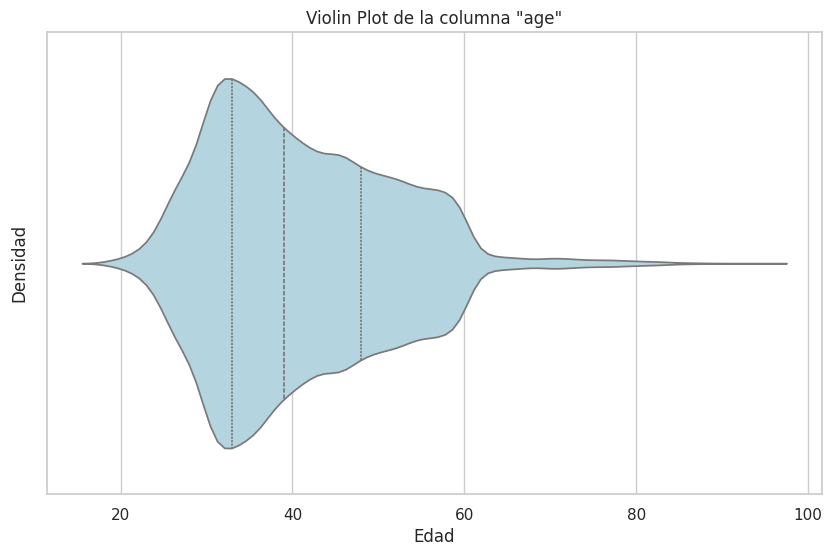

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'data' es tu DataFrame y 'age' es el nombre de la columna que deseas visualizar en el violin plot

# Configura el estilo de seaborn
sns.set(style="whitegrid")

# Crea el violin plot con el color azul claro
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
sns.violinplot(x='age', data=data, inner="quartile", color='lightblue')

# Añade título y etiquetas
plt.title('Violin Plot de la columna "age"')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# Muestra el gráfico
plt.show()


**JOB**

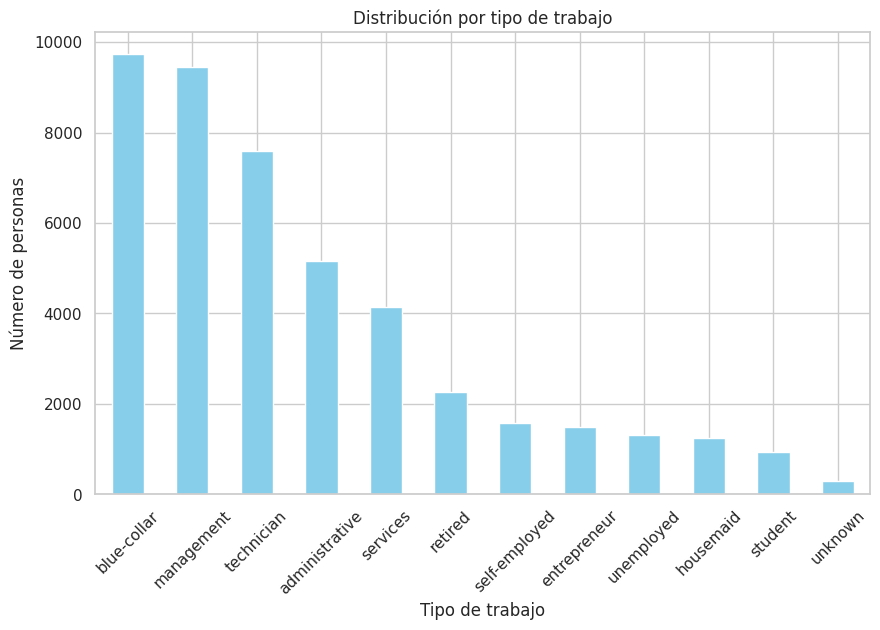

In [6]:
import matplotlib.pyplot as plt

# Contar el número de personas en cada tipo de trabajo
job_counts = data['job'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución por tipo de trabajo')
plt.xlabel('Tipo de trabajo')
plt.ylabel('Número de personas')
plt.xticks(rotation=45)
plt.show()


**MARITAL**

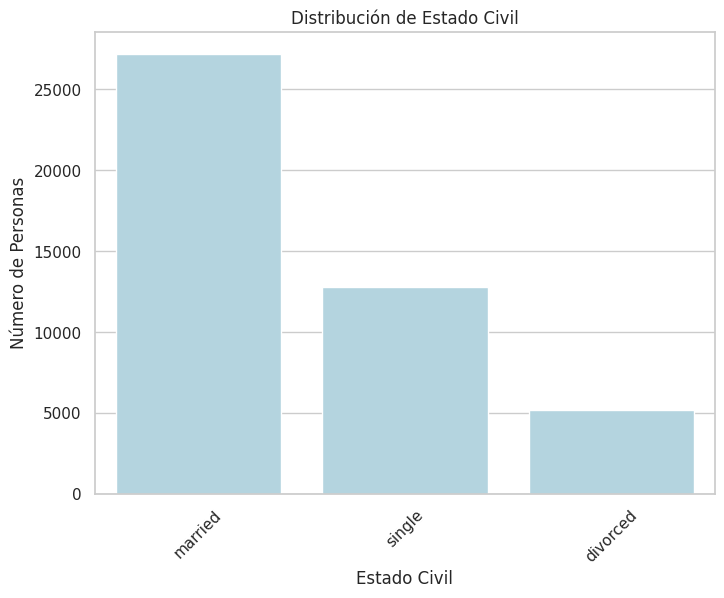

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la distribución de la variable "marital"
marital_counts = data['marital'].value_counts()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=marital_counts.index, y=marital_counts.values, color='lightblue')
plt.title('Distribución de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.show()


**Education**

<ipython-input-8-0a14ee89fd9c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette="Blues")


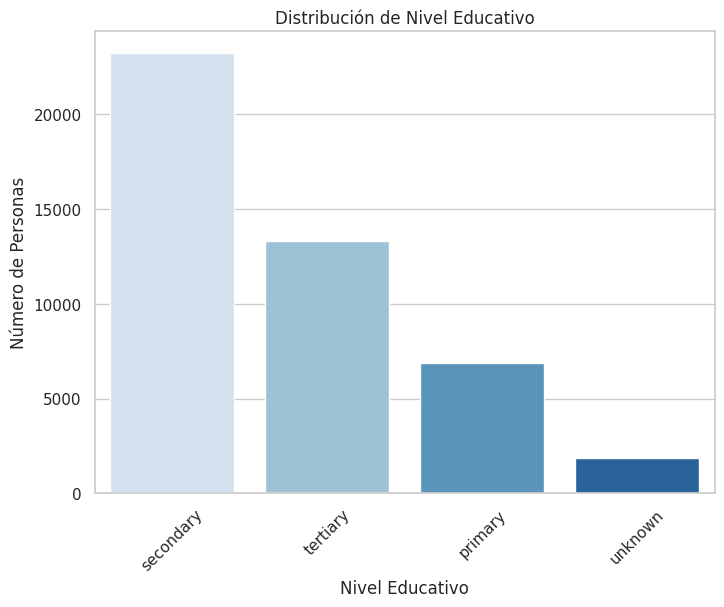

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la distribución de la variable "education"
education_counts = data['education'].value_counts()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette="Blues")
plt.title('Distribución de Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.show()


**DEFAULT**

<ipython-input-9-6731bca45209>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_counts.index, y=default_counts.values, palette="Blues")


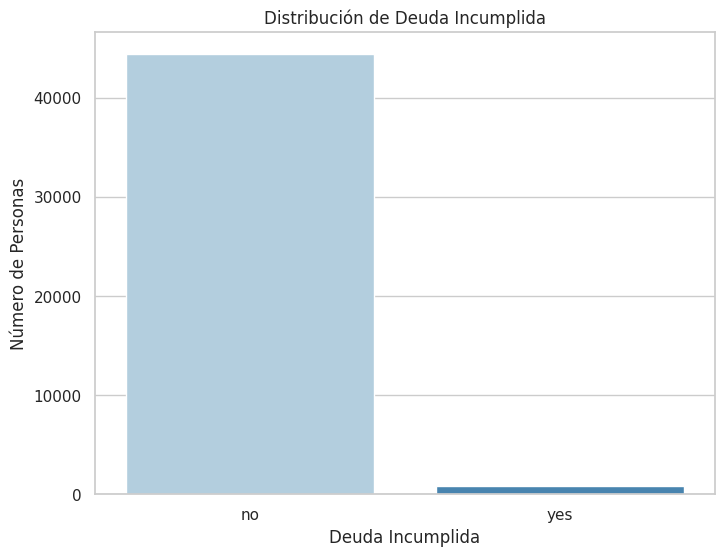

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la distribución de la variable "default"
default_counts = data['default'].value_counts()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=default_counts.index, y=default_counts.values, palette="Blues")
plt.title('Distribución de Deuda Incumplida')
plt.xlabel('Deuda Incumplida')
plt.ylabel('Número de Personas')
plt.show()


**Balance**

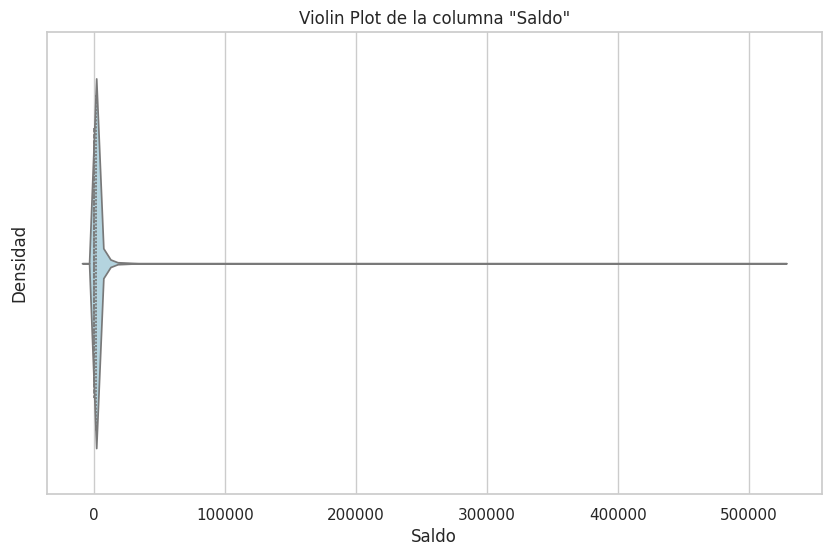

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'data' es tu DataFrame y 'age' es el nombre de la columna que deseas visualizar en el violin plot

# Configura el estilo de seaborn
sns.set(style="whitegrid")

# Crea el violin plot con el color azul claro
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
sns.violinplot(x='balance', data=data, inner="quartile", color='lightblue')

# Añade título y etiquetas
plt.title('Violin Plot de la columna "Saldo"')
plt.xlabel('Saldo')
plt.ylabel('Densidad')

# Muestra el gráfico
plt.show()


**Housing**

<ipython-input-19-6731bca45209>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_counts.index, y=default_counts.values, palette="Blues")


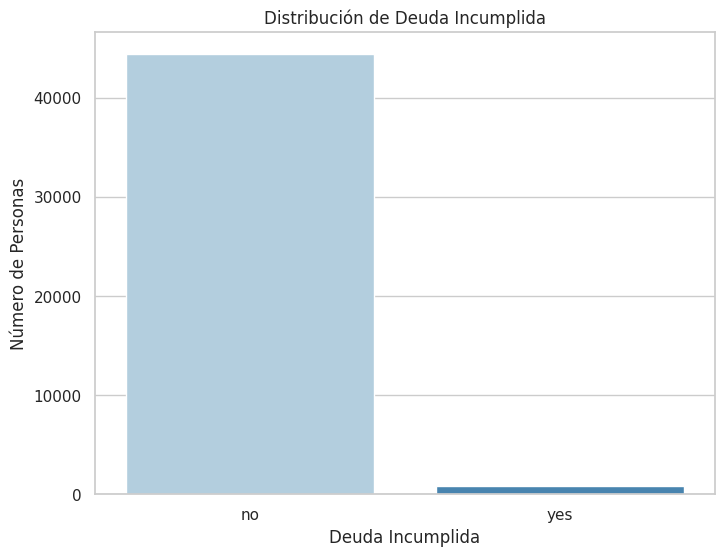

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la distribución de la variable "default"
default_counts = data['default'].value_counts()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=default_counts.index, y=default_counts.values, palette="Blues")
plt.title('Distribución de Deuda Incumplida')
plt.xlabel('Deuda Incumplida')
plt.ylabel('Número de Personas')
plt.show()

**Balance**

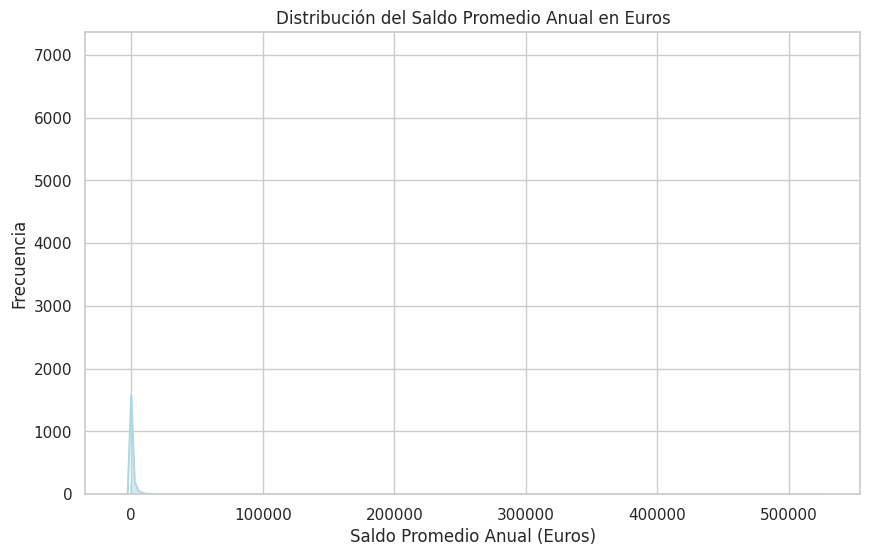

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='balance', kde=True, color='lightblue')
plt.title('Distribución del Saldo Promedio Anual en Euros')
plt.xlabel('Saldo Promedio Anual (Euros)')
plt.ylabel('Frecuencia')
plt.show()


**HOUSING**

<ipython-input-20-0c6333f75bb0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_counts.index, y=default_counts.values, palette="Blues")


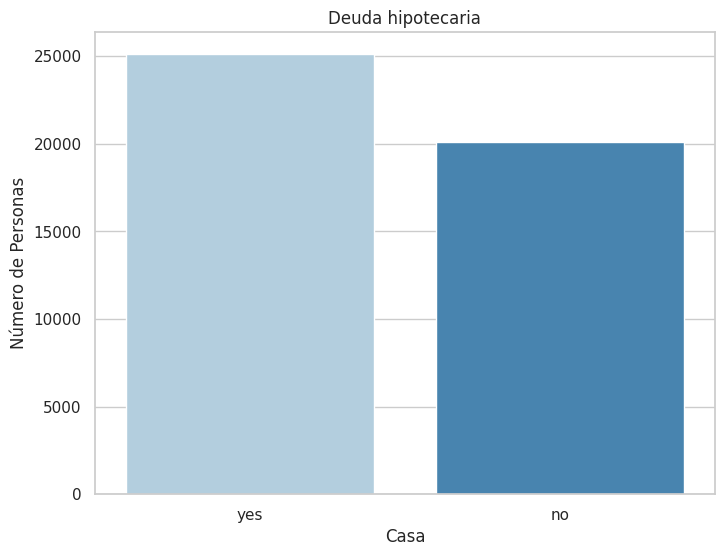

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la distribución de la variable "default"
default_counts = data['housing'].value_counts()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=default_counts.index, y=default_counts.values, palette="Blues")
plt.title('Deuda hipotecaria')
plt.xlabel('Casa')
plt.ylabel('Número de Personas')
plt.show()

**Creditos de consumo**

<ipython-input-22-c98b5b30e507>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_counts.index, y=default_counts.values, palette="Blues")


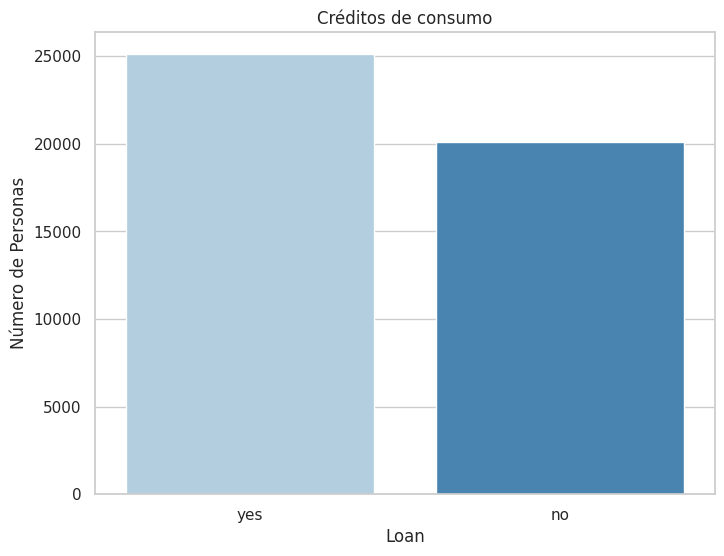

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la distribución de la variable "default"
default_counts = data['housing'].value_counts()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=default_counts.index, y=default_counts.values, palette="Blues")
plt.title('Créditos de consumo')
plt.xlabel('Loan')
plt.ylabel('Número de Personas')
plt.show()

**Contacto**

<ipython-input-21-266b5a1baadc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette="Blues")


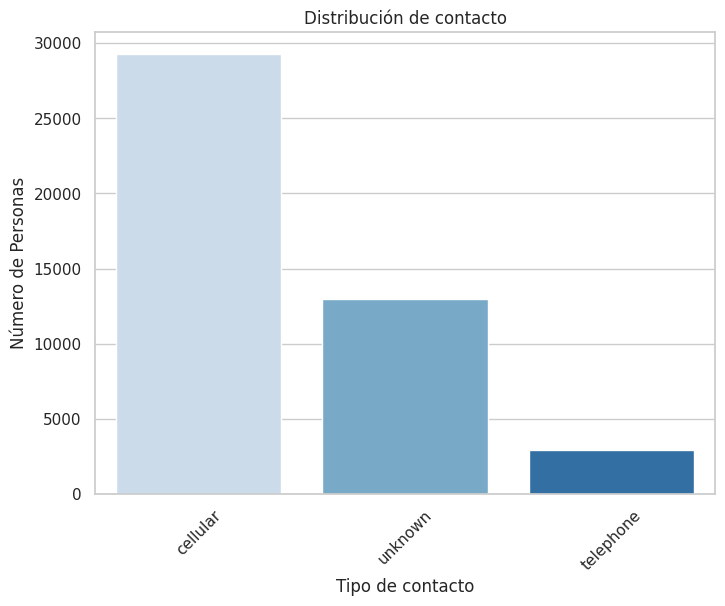

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la distribución de la variable "education"
education_counts = data['contact'].value_counts()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette="Blues")
plt.title('Distribución de contacto')
plt.xlabel('Tipo de contacto')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.show()


**mes**

<ipython-input-26-3aff1430d7d8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette="Blues")


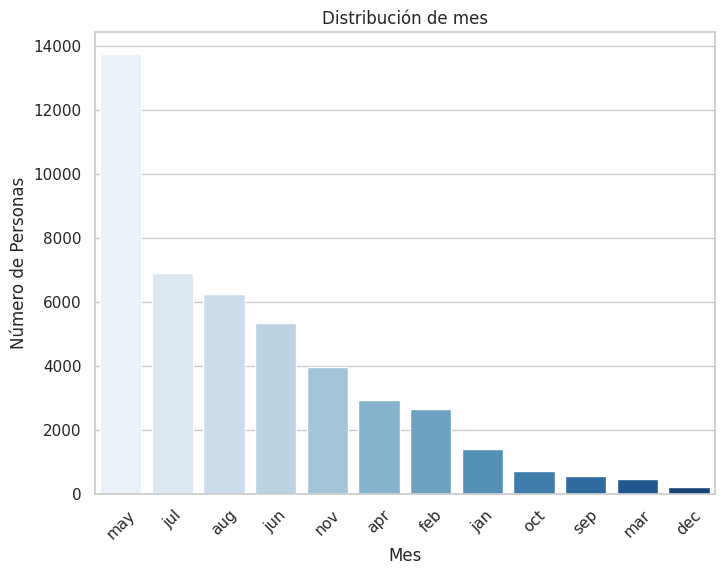

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la distribución de la variable "education"
education_counts = data['month'].value_counts()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette="Blues")
plt.title('Distribución de mes')
plt.xlabel('Mes')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.show()


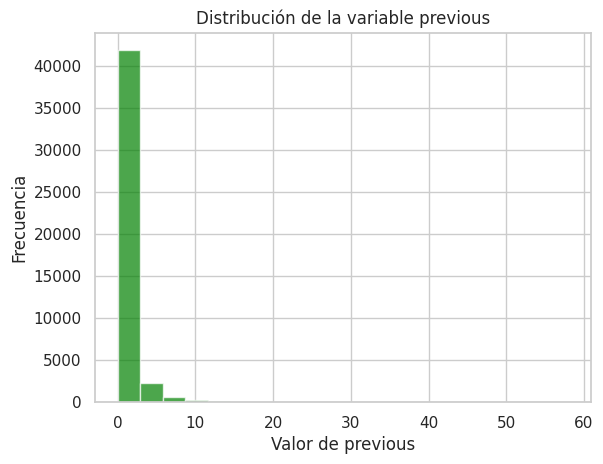

In [29]:
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado 'datos' y quieres visualizar la columna 'previous'

# Extrae la columna 'previous' de tu DataFrame
previous = data['previous']

# Crea un histograma para visualizar la distribución de la variable numérica 'previous'
plt.hist(previous, bins=20, color='green', alpha=0.7)
plt.xlabel('Valor de previous')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable previous')
plt.show()


# 2 Análisis univariado

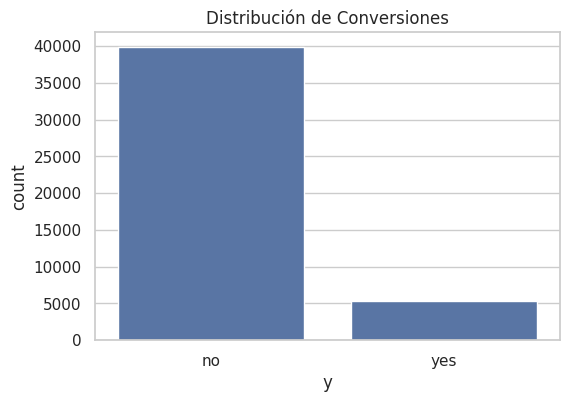

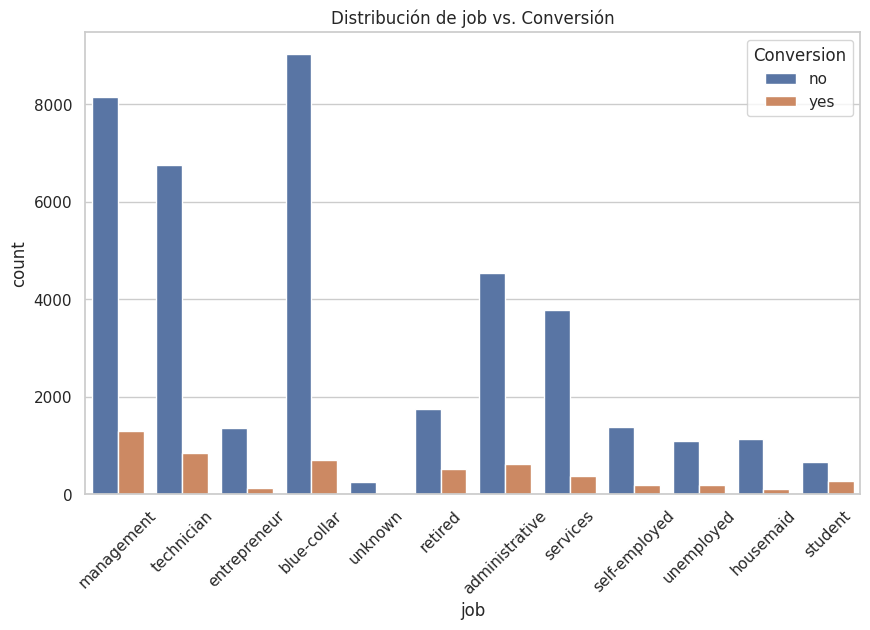

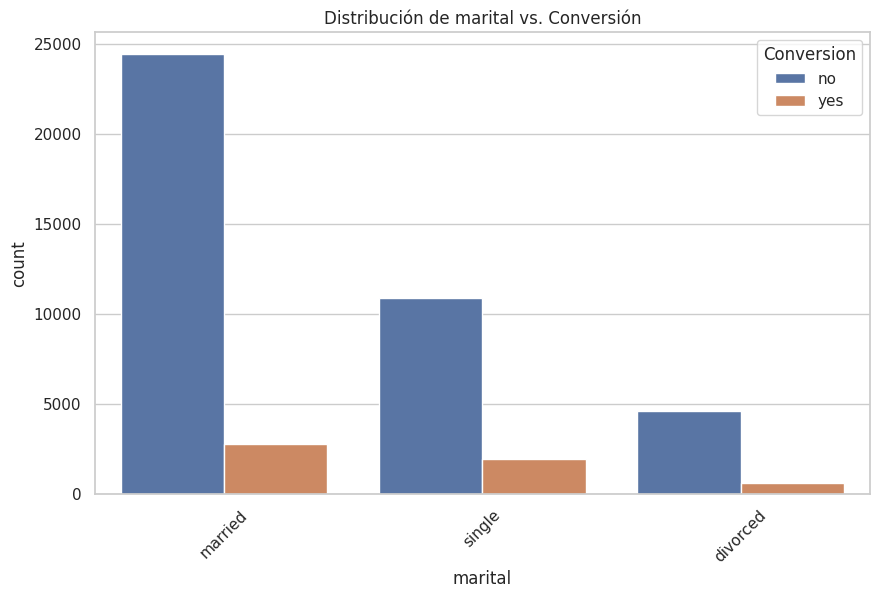

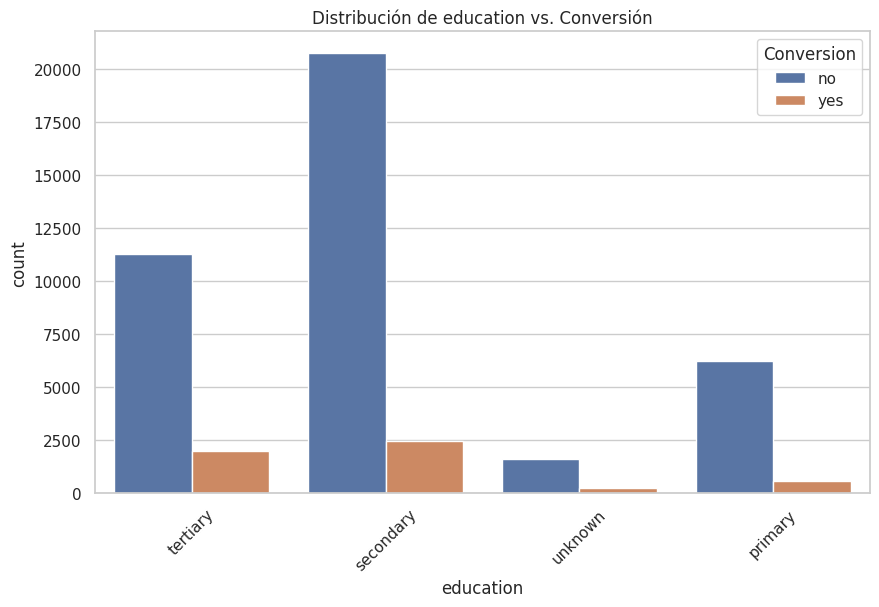

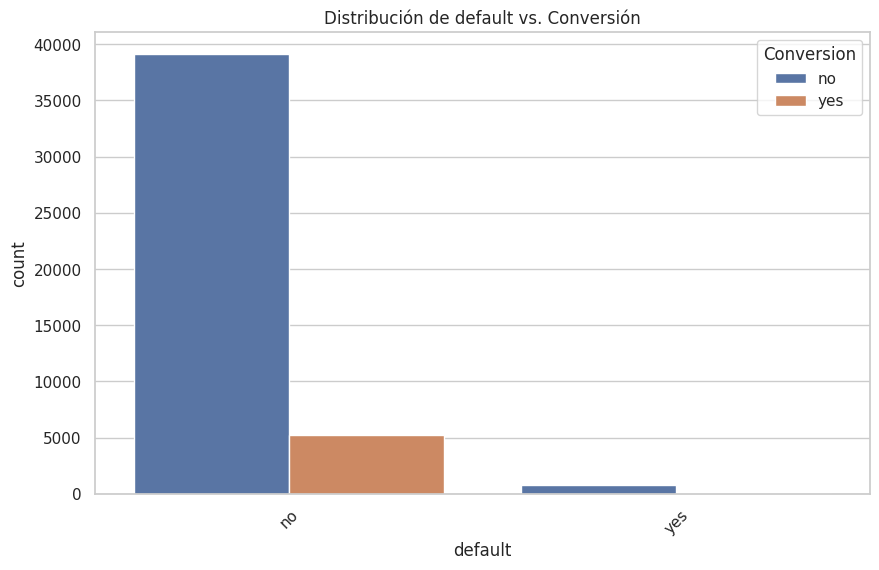

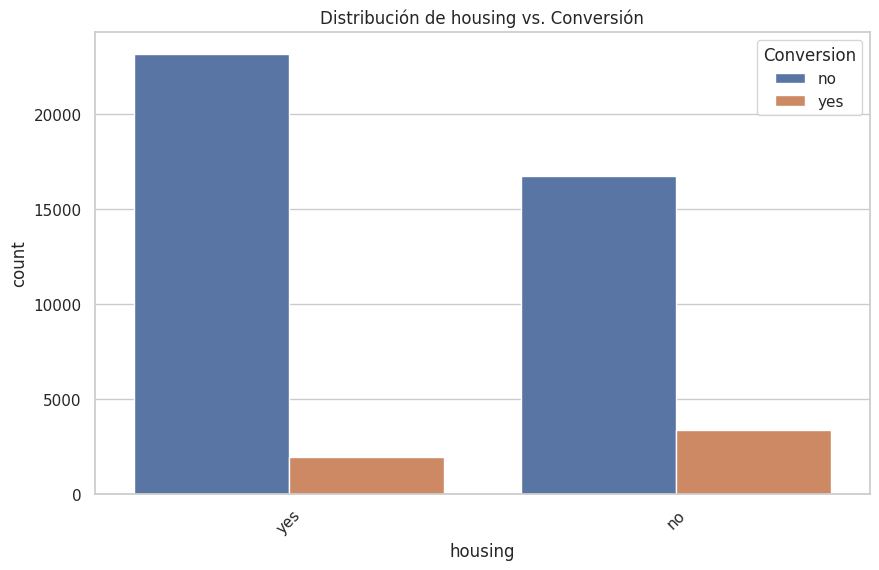

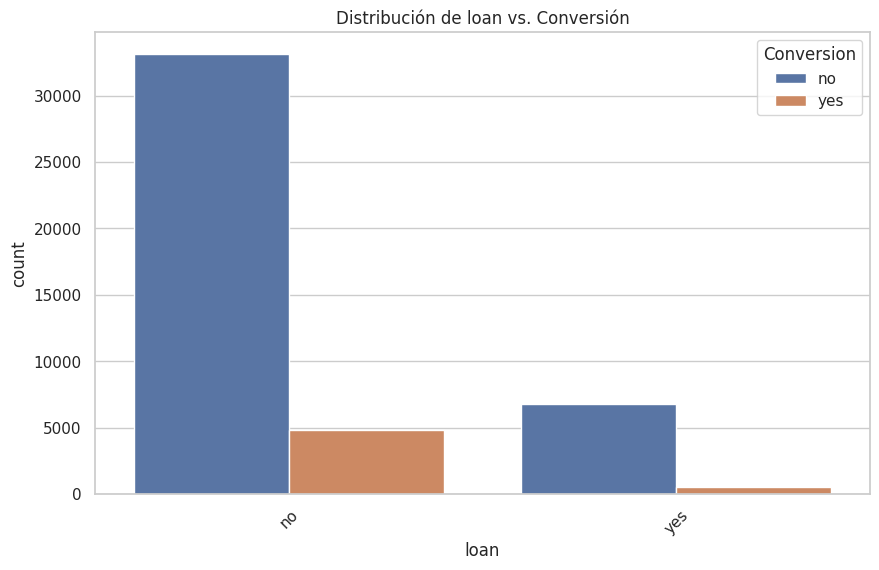

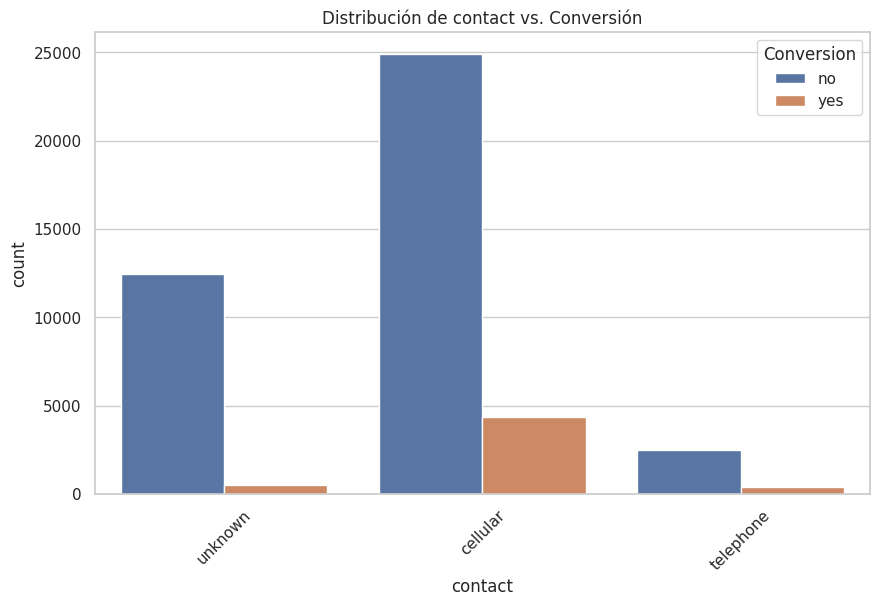

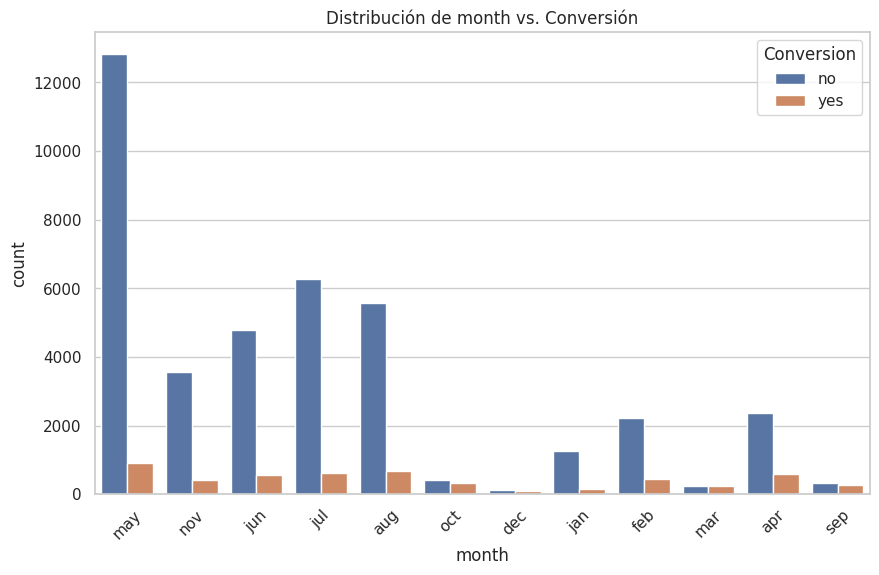

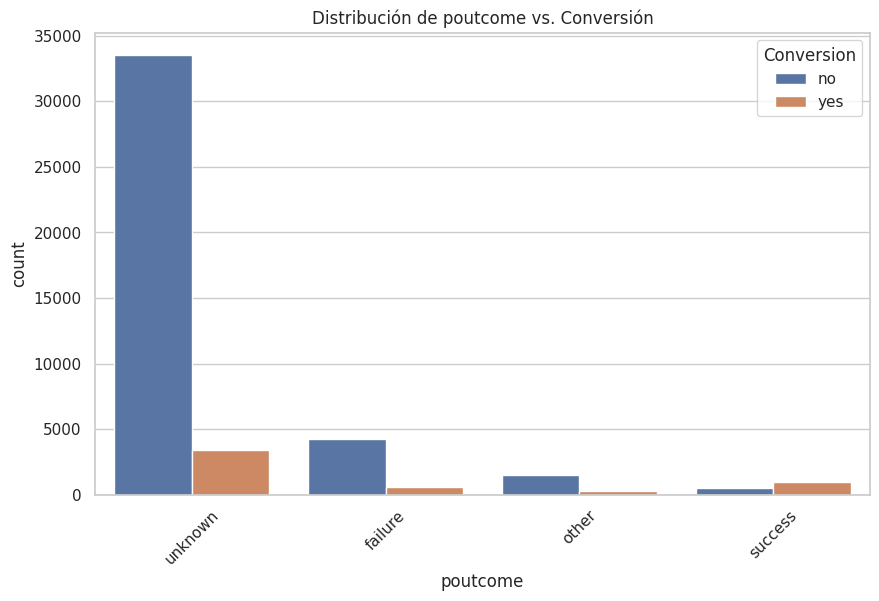

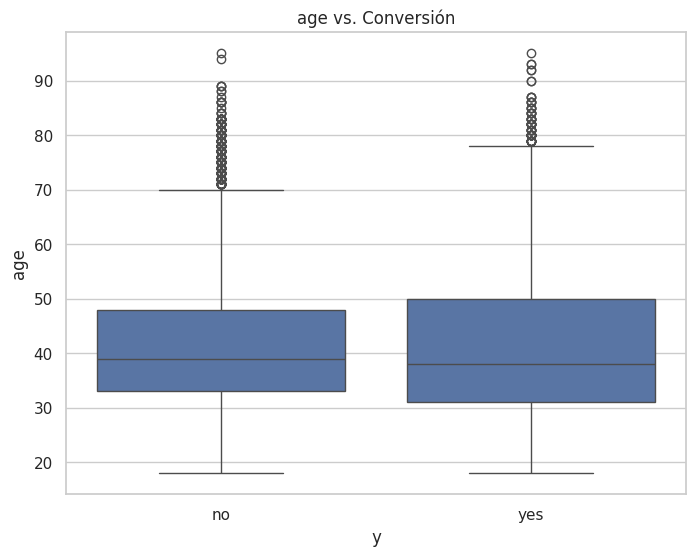

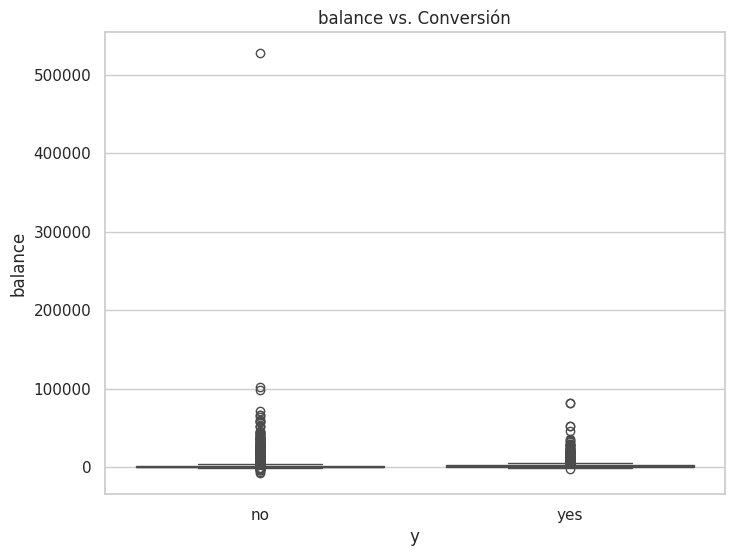

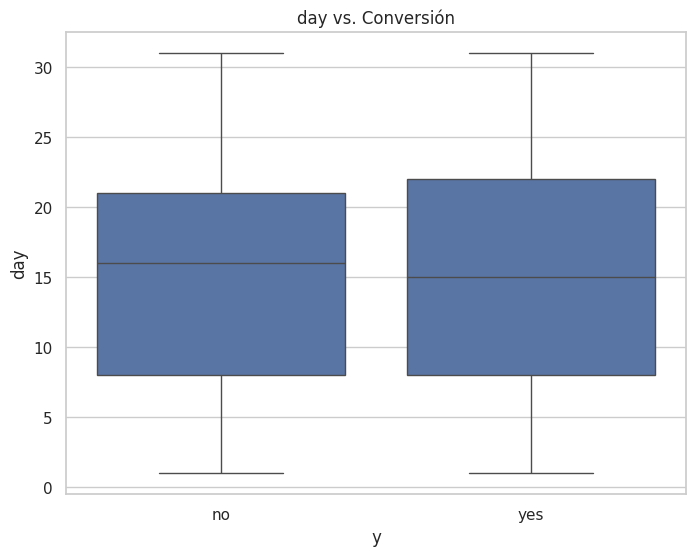

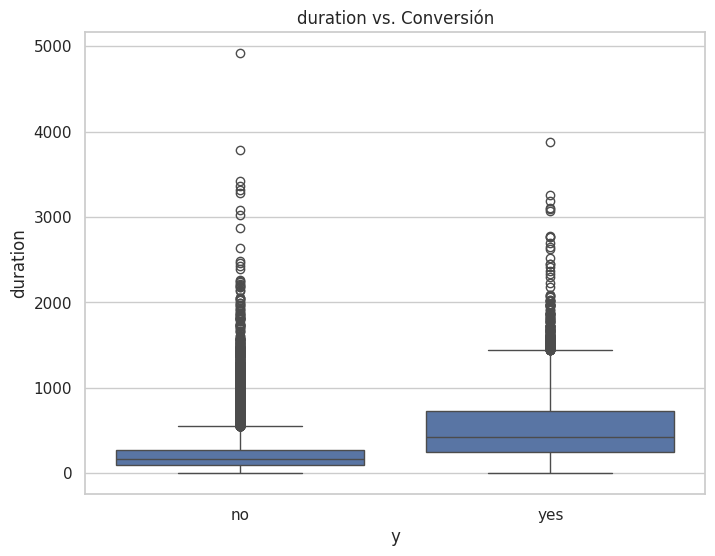

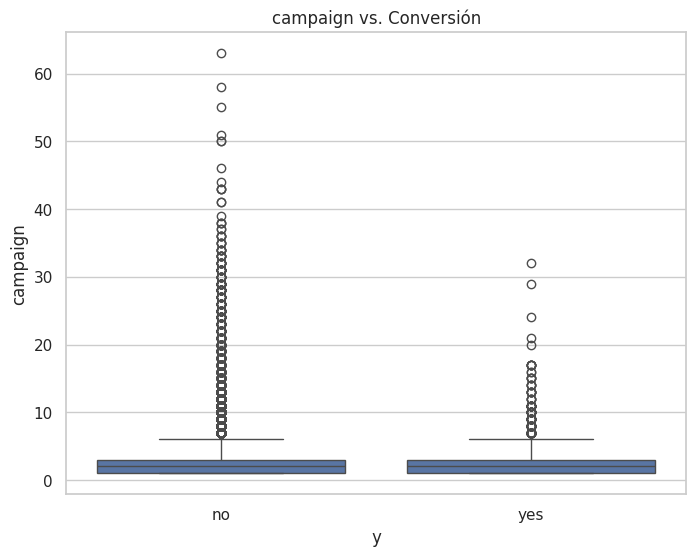

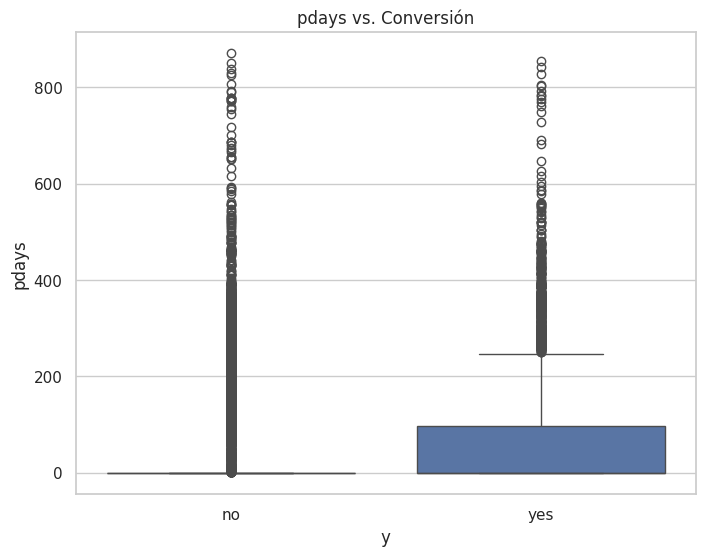

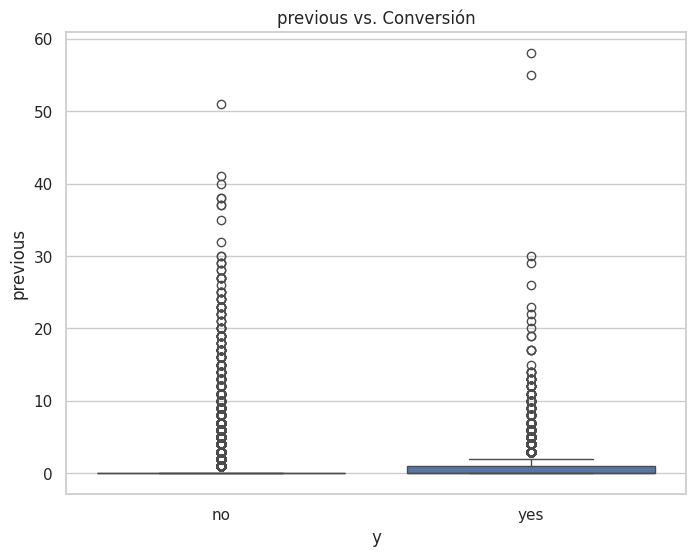

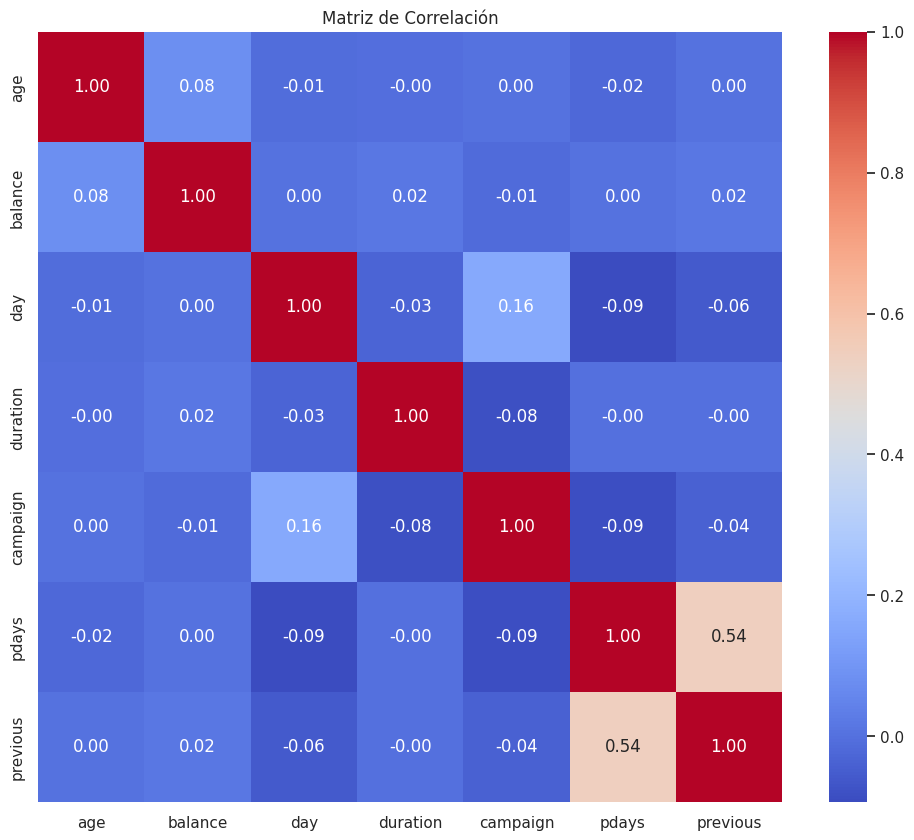

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
# Supongamos que 'data' es tu DataFrame que contiene todas las variables, incluida 'y'
# Reemplaza 'data' con el nombre real de tu DataFrame
# data = ...

# Gráfico de barras para la variable 'y' (conversión)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='y')
plt.title('Distribución de Conversiones')
plt.show()

# Gráfico de barras apiladas para otras variables categóricas vs. 'y'
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=var, hue='y')
    plt.title(f'Distribución de {var} vs. Conversión')
    plt.xticks(rotation=45)
    plt.legend(title='Conversion', loc='upper right')
    plt.show()

# Boxplot para variables numéricas condicionadas a 'y'
numeric_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='y', y=var)
    plt.title(f'{var} vs. Conversión')
    plt.show()

# Matriz de correlación entre variables numéricas y 'y'
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matriz de Correlación')

plt.show()

# 3. Análisis bivariado:

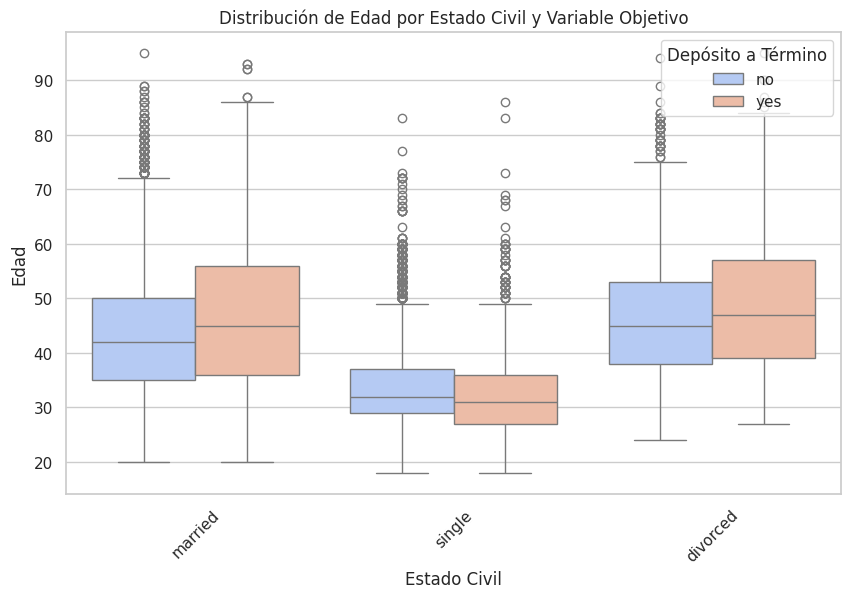

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja para edad (age) vs. estado civil (marital) vs. variable objetivo (y)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='marital', y='age', hue='y', palette='coolwarm')
plt.title('Distribución de Edad por Estado Civil y Variable Objetivo')
plt.xlabel('Estado Civil')
plt.ylabel('Edad')
plt.legend(title='Depósito a Término', loc='upper right')
plt.xticks(rotation=45)
plt.show()




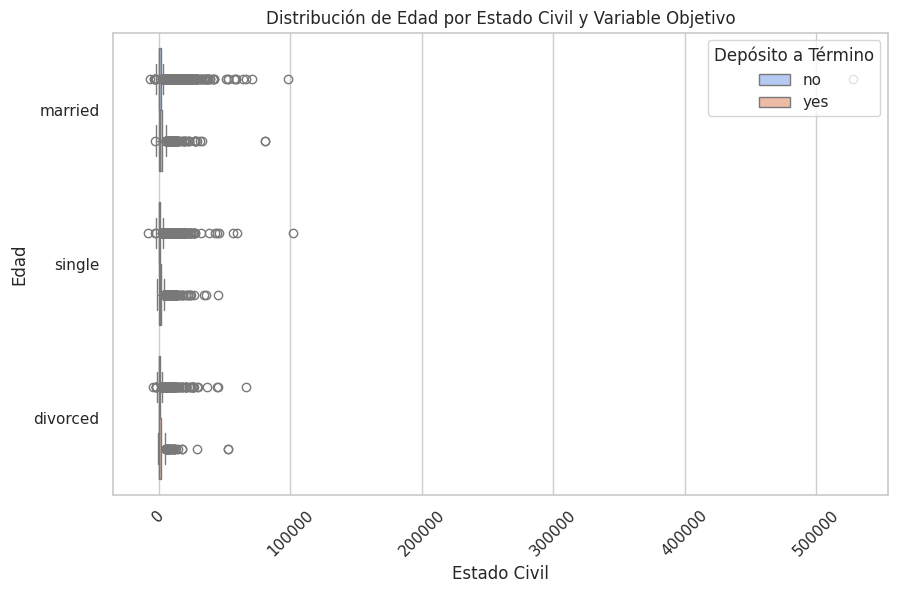

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja para edad (age) vs. estado civil (marital) vs. variable objetivo (y)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='balance', y='marital', hue='y', palette='coolwarm')
plt.title('Distribución de Edad por Estado Civil y Variable Objetivo')
plt.xlabel('Estado Civil')
plt.ylabel('Edad')
plt.legend(title='Depósito a Término', loc='upper right')
plt.xticks(rotation=45)
plt.show()


# Conclusiones


<font color='blue'> Las variables poutcome, job, grupos balance y grupos edad son las que mas impacto tienen. <font>

El perfil ideal de cliente que compra es:

- Debe haber adquirido previamnete el producto
- Perfil laboral (top-3)
- Saldo de cuanta entre 16k y 20k
- Edad entre 18 y 25 aos
- Que no cuente con credito de consumo "defaul" </font>






<font color='blue'> **APUNTES**

0. Preguntas
1. Limpieza
2. Estadística
3. Conclusiones del paso 2 y responder preguntas por encima.
4. Modelado
5. Responder preguntas finales



  4.1 Normalizar (min-max Scaling). NO SIEMPRE ES NECESARIO pero viene bien

  4.2 Métricas en funcion de tu dataset será una más importante que otra:

-  **Select Kbest** De primeras si quieres ir rapido

- **Arbol de decisión** siempre probamos, no le afecta la normalización
      
- **Random Forest**: nos saca la validacion automáticamente, más *generico*.

- Si sale muy corelacionado y hago el **naive bayes** NO tiene sentido. Si las características están altamente correlacionadas entre sí, el clasificador Naive Bayes puede no funcionar tan bien

-  Muchos outlier hago **suppoort vector machine**, pero para sataset grandes no. Si tengo pocos datos

- El **Gradient boosting** muy concreto. No hace falta que lo limpies.

- **Grid search** muchos recursos necesitas. **Grid search**  no se garantiza la mejor opción porque es aletorio pero esta bien-

- **Overfiting** mi modelo no debe pasar por todos los dataos, sino no s epuede aplicar a otros registros.

- Ensamble: mezclas dos


Notas adiciones:

- En general siempre escalamos (normalizamos) porque o nos quedamos igual o mejor.

- Hacer un modelo que diferente entre sanos y enfermos, y luego hago otro modelo solo con los enfermos. Esto se puede aplicar a todo, no solo en un caso medico.

- Hay que adaptarse al dataset, si es muy complejo hacemos un modelo complejo. Si es facil hacemos un modelodo facil para evitar Overfiitng




